# Enrichment scoring

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from escoring.enrichment_scoring import calculate_escores
from escoring.support_funcs import pairwise_similarities

## 1. Load the data

In [2]:
os.chdir("../nestorowa")

In [3]:
data = pd.read_hdf("nestorowa_processed.h5")  # counts
PC20 = np.loadtxt("nestorowa_20PC.txt", delimiter="\t")  # top 20 PCs
UMAP = np.loadtxt("nestorowa_UMAP.txt", delimiter="\t")  # 2D UMAP

In [4]:
with open("nestorowa_dd_rcells.txt", "r") as f:
    r_cells = [int(c.strip("\n")) for c in f.readlines()]
f.close()

## 2. Create the similarity matrix

In [5]:
g = 8.6e-4

In [6]:
S = pairwise_similarities(PC20,  # similarities in the 20 PC space
                          query=r_cells,  # only to the reference cells
                          metric="rbf",  # metric as in notebook 1
                          metric_params={"gamma": g})

## 3. Calculate enrichment scores

Because we use the pandas matrix for easy interpretation, we first map the reference cells to cell names

In [7]:
r_cells = data.index[r_cells]

In [8]:
escores = calculate_escores(data, query=r_cells, S=S)

Start enrichment scoring using 32 CPUs
Creating process pool
Run enrichment scoring
Enrichment scoring complete


In [9]:
escores

,HSPC_117,HSPC_232,HSPC_336,LT-HSC_044,LT-HSC_068,LT-HSC_077,LT-HSC_124,Prog_029,Prog_182,Prog_210,Prog_369,Prog_487,Prog_488,Prog_729,Prog_734,Prog_736,Prog_775
Scml2,-0.001000,-0.000617,-0.000083,0.000264,0.006993,-0.000248,-0.000331,0.010661,-0.002982,-0.006248,0.016975,-0.009208,-0.006695,0.002834,0.011618,0.001985,-0.000169
Narf,-0.001122,-0.001257,-0.000425,0.000326,-0.021825,-0.000748,-0.002356,0.050734,0.002365,-0.006893,0.064831,-0.028326,-0.026291,-0.001775,0.037269,-0.006476,0.000398
Cav2,-0.000713,0.000567,-0.000317,0.000173,0.037696,-0.000255,0.001971,-0.014747,-0.006356,-0.003136,-0.026810,-0.007051,0.006162,-0.001351,-0.011436,0.010312,-0.000101
Fer,-0.000990,-0.000630,-0.000253,-0.000054,0.002575,-0.000248,-0.000522,0.020858,0.003849,-0.004435,0.023561,-0.011758,-0.007131,-0.001152,0.012742,0.002987,-0.000264
Slc22a18,-0.000457,-0.000286,-0.000355,-0.000191,0.017989,-0.000298,0.001891,-0.012903,-0.001306,0.000787,-0.013474,0.000638,0.007671,0.002727,0.005643,0.009219,-0.000153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gm43660,-0.000486,-0.000329,-0.000187,0.000803,0.008852,0.000008,-0.000308,-0.002658,-0.002926,-0.000229,-0.003899,-0.002590,0.000237,0.000118,-0.002125,0.003128,-0.000016
AI839979,0.005194,-0.000347,-0.000113,-0.000235,-0.013461,-0.000149,-0.001381,-0.012405,-0.004065,-0.005260,-0.017125,0.018421,-0.004632,-0.002329,-0.024358,-0.011843,-0.000070
Gm40309,-0.000476,-0.000703,-0.000151,-0.000750,-0.009371,-0.000392,-0.001069,0.004367,0.004146,-0.003337,0.007996,0.024731,0.001277,-0.001052,-0.005179,-0.006263,-0.000207
Gm43051,-0.000387,0.001990,-0.000138,0.000593,-0.002065,-0.000162,-0.000891,-0.005327,-0.002051,0.001637,-0.008362,0.001943,-0.000431,-0.000246,-0.009415,-0.002724,-0.000049


## 3. Visualize top scoring genes for each reference cell

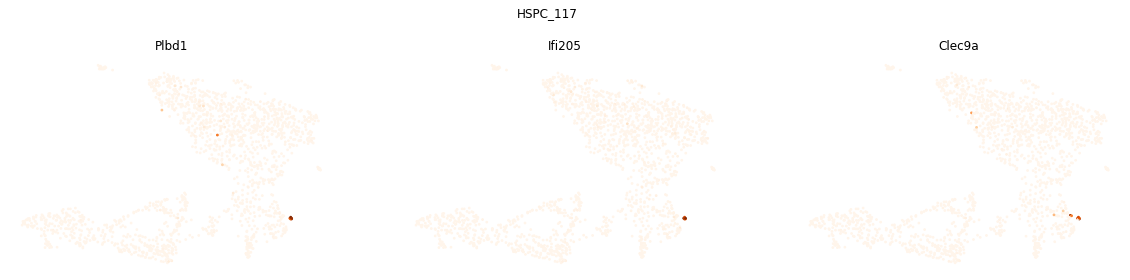

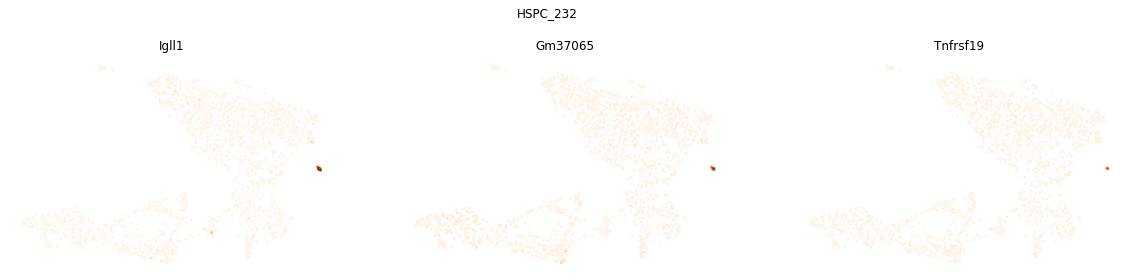

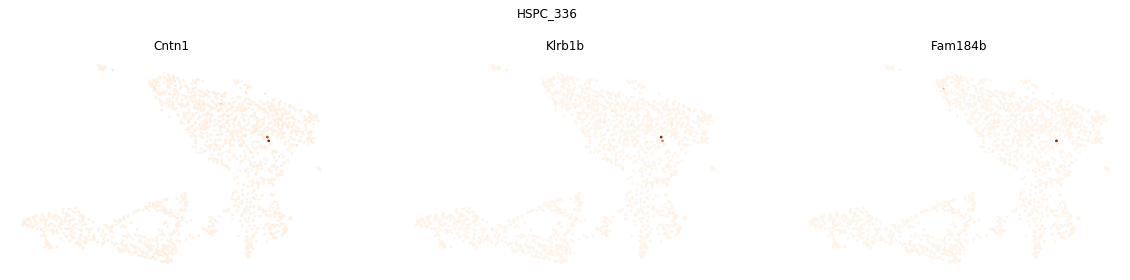

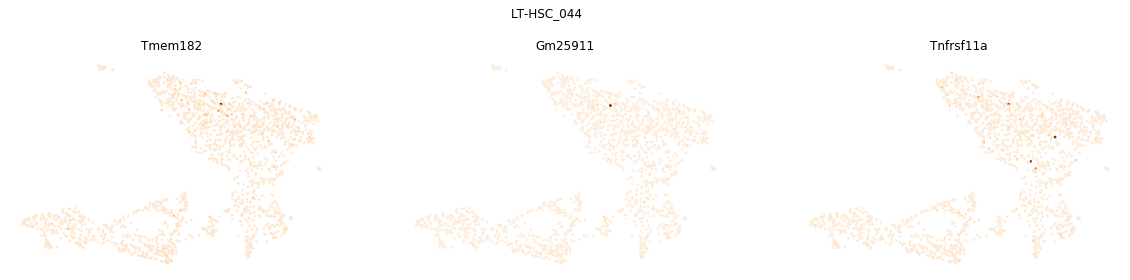

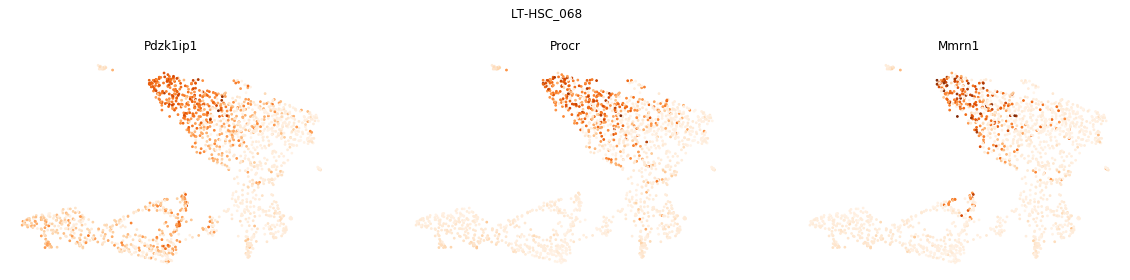

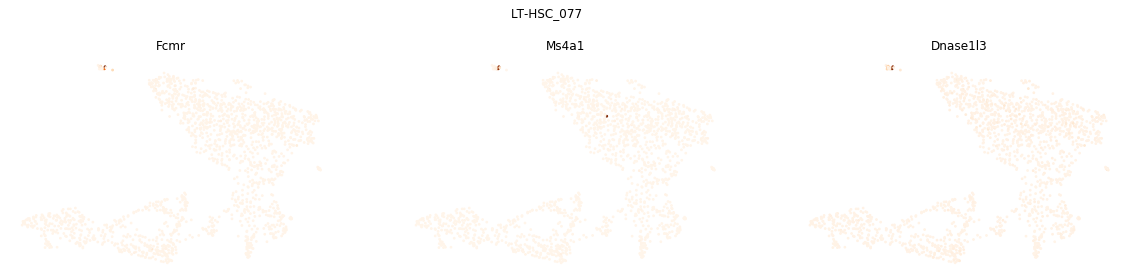

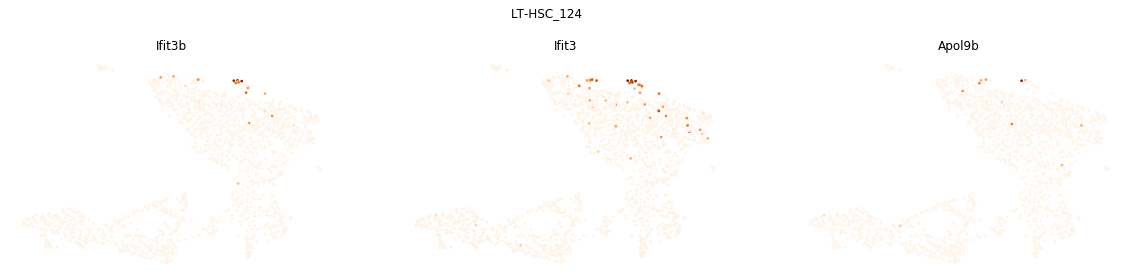

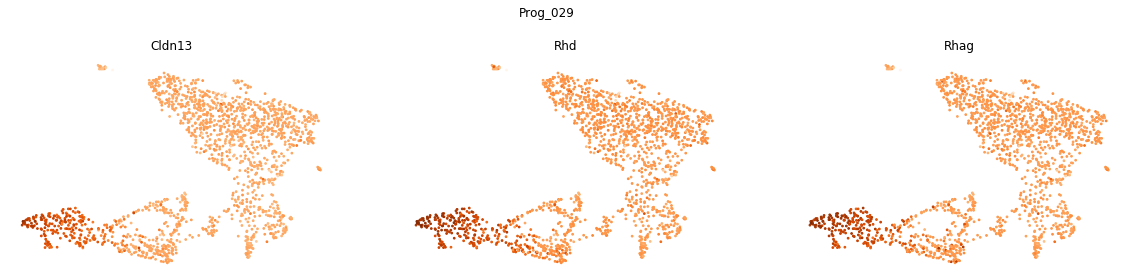

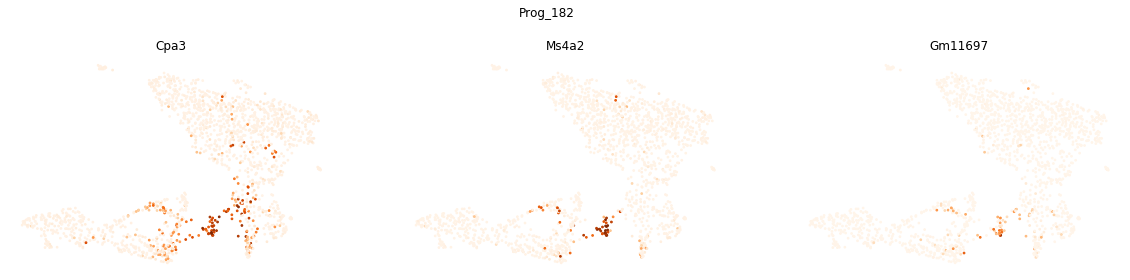

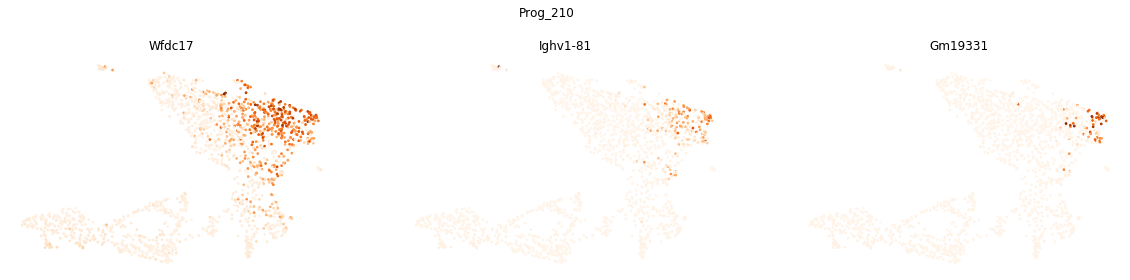

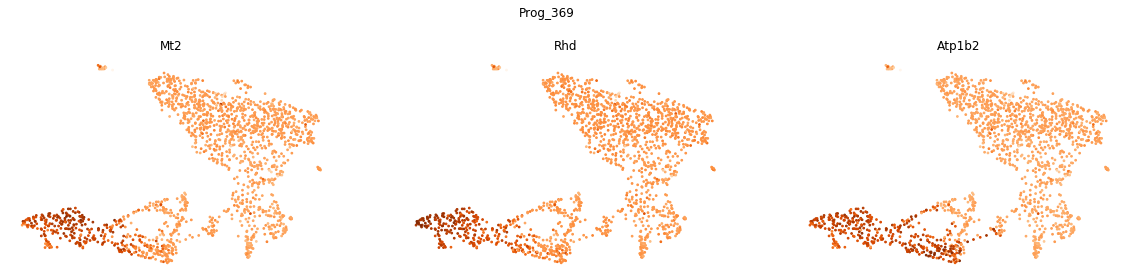

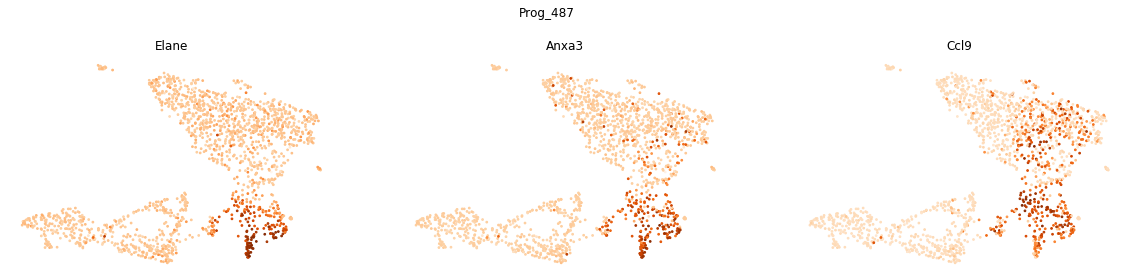

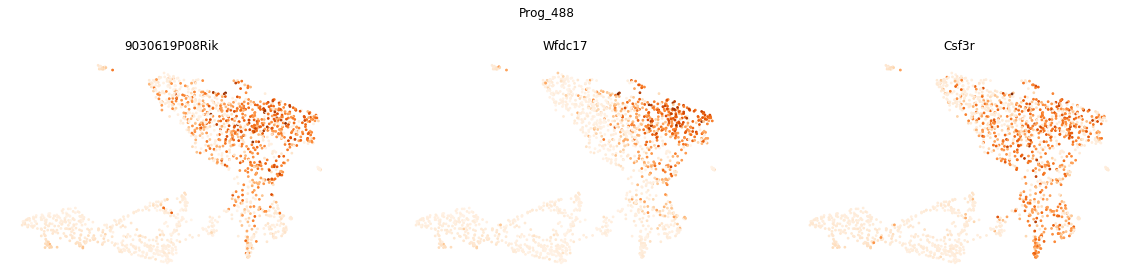

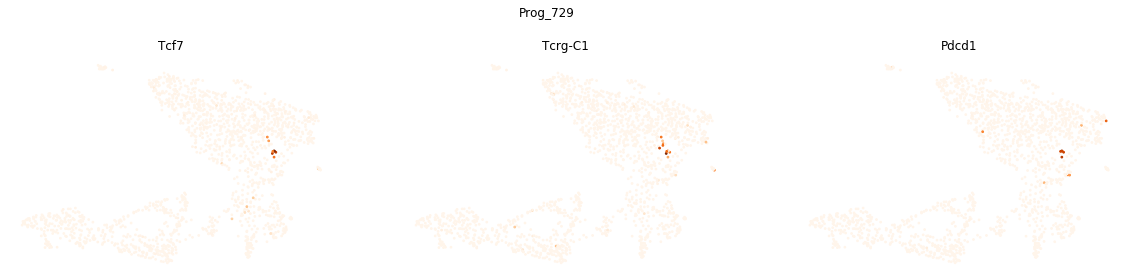

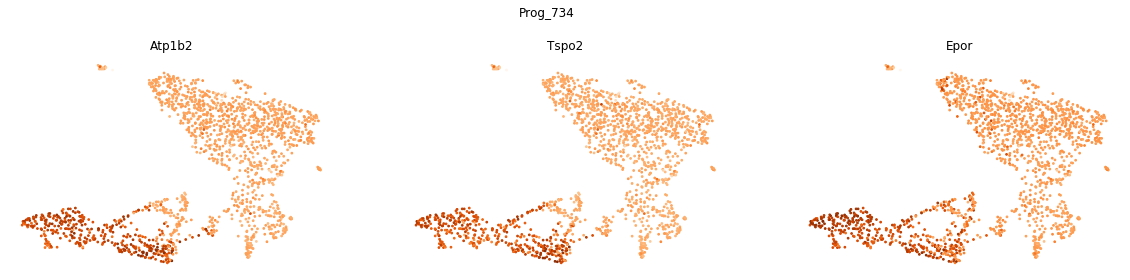

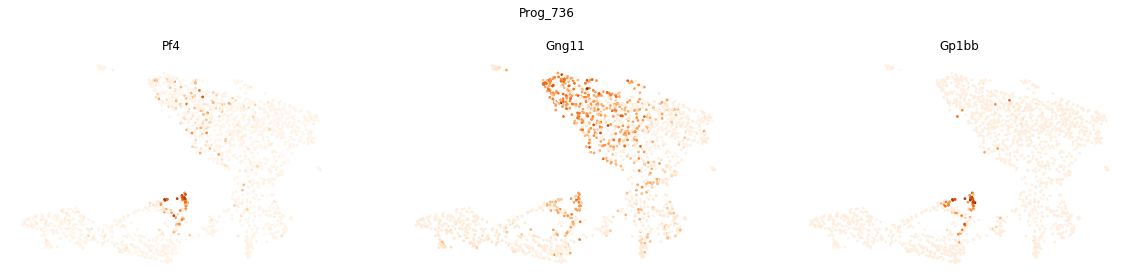

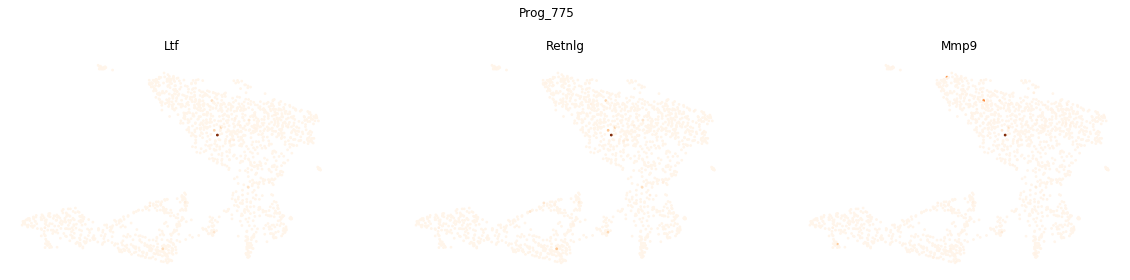

In [10]:
for cell in r_cells:
    fig, axs = plt.subplots(1, 3)
    fig.set_figwidth(20)
    top3 = escores.sort_values(by=cell, ascending=False).index[0:3]
    for ax, gene in zip(axs, top3):
        exp = data.loc[:, gene].values
        ax.scatter(UMAP[:, 0], UMAP[:, 1], c=exp, cmap="Oranges", s=3)
        ax.axis("off")
        ax.set_title(gene)
    plt.suptitle(cell, y=1.05)
    plt.show()